In [ ]:
import pandas as pd

# Caminho do arquivo carregado
file_path = '/content/student-mat.csv'

# Leitura do arquivo CSV
df_mat = pd.read_csv(file_path, delimiter=';')

# Exibição das primeiras linhas do DataFrame para entender os dados
df_mat.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# Configuração da precisão de exibição dos números
pd.set_option('display.precision', 2)

# Verificação dos tipos de dados
print(df_mat.dtypes)

# Verificação do formato do dataframe
print(df_mat.shape)

# Descrição estatística dos dados
description = df_mat.describe()

description


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object
(395, 33)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,8.00,9.00,8.00
50%,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00


In [ ]:
# Criação da variável categórica de sucesso
df_mat['success'] = (df_mat['G3'] >= 12).astype(int)

# Verificação do balanceamento da nova variável categórica
class_counts = df_mat['success'].value_counts()

class_counts


0    233
1    162
Name: success, dtype: int64

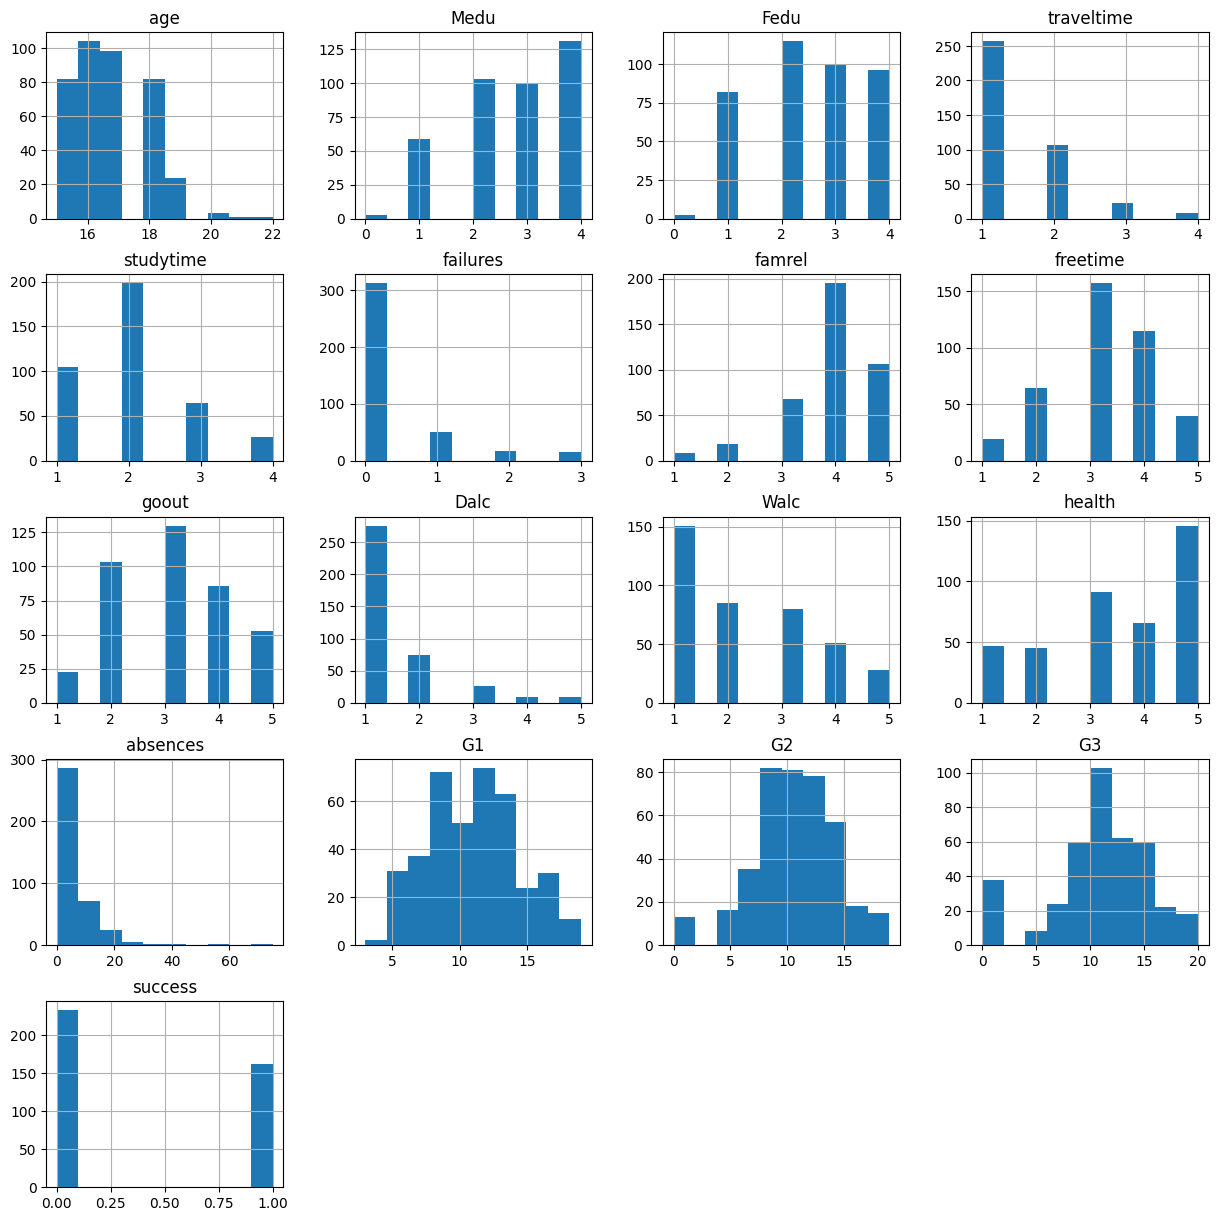

ShapiroResult(statistic=0.9749146103858948, pvalue=2.4554813080612803e-06)

In [ ]:
from matplotlib import pyplot as plt
from scipy.stats import shapiro

# Histograma de todas as variáveis numéricas
df_mat.hist(figsize=(15, 15))
plt.show()

# Teste Shapiro para verificar a normalidade da distribuição de G1
shapiro_result_G1 = shapiro(df_mat['G1'])

shapiro_result_G1


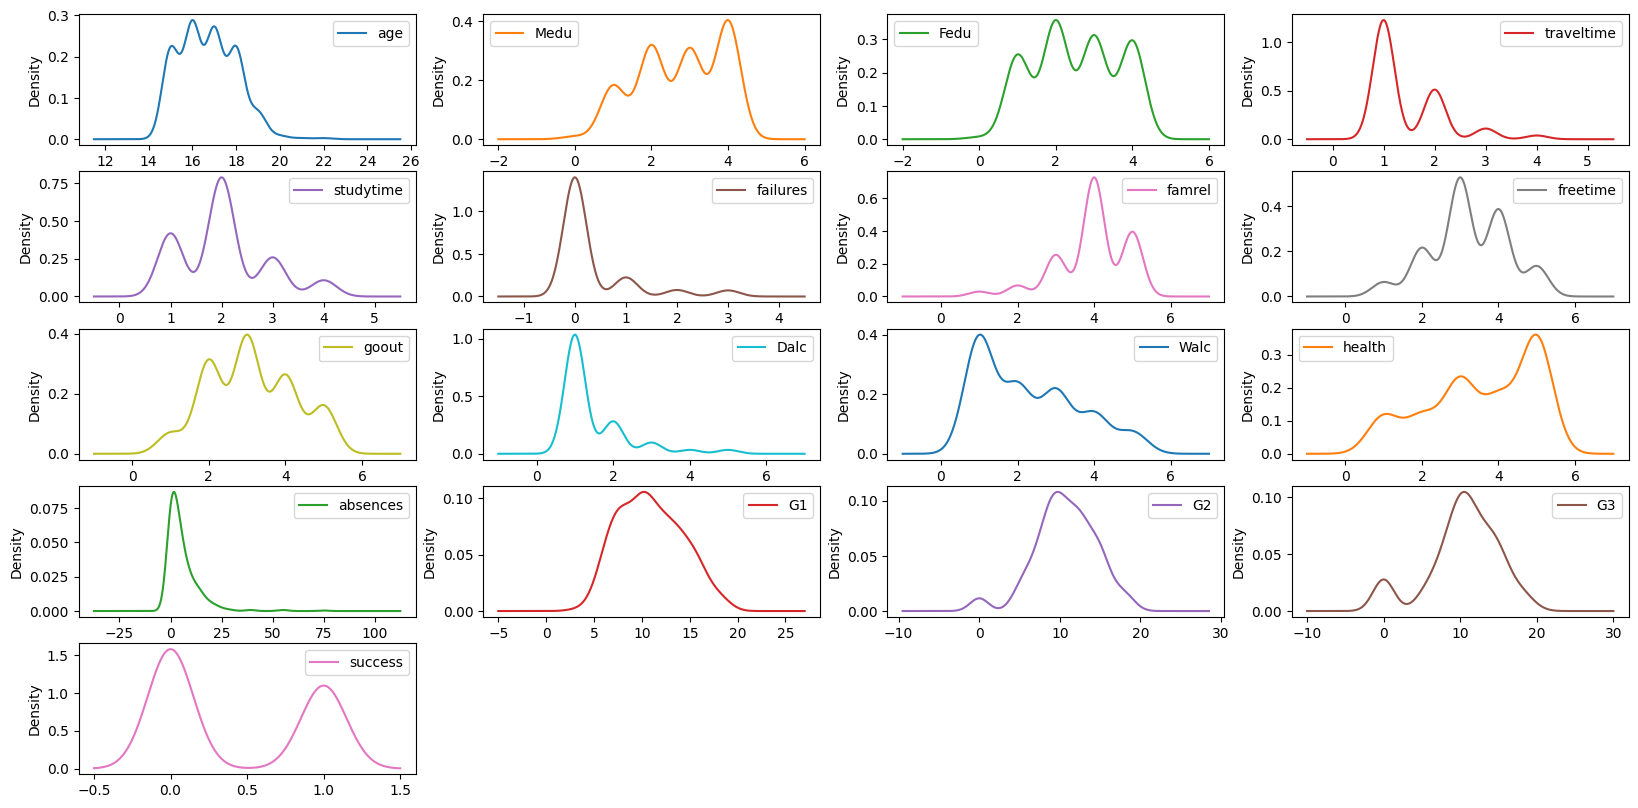

In [ ]:
# Gráfico de densidade para todas as variáveis numéricas
df_mat.plot(kind='density', subplots=True, layout=(8, 4), figsize=(20, 16), sharex=False)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Removendo dados faltantes (opcional neste caso, pois já sabemos que não há dados faltantes)
df_mat_cleaned = df_mat.dropna()

# Removendo instâncias duplicadas
df_mat_unique = df_mat_cleaned.drop_duplicates()

# Separando variáveis de entrada (X) e saída (y)
X = df_mat_unique.drop('success', axis=1)
y = df_mat_unique['success']

# Separando conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificando colunas numéricas e categóricas
num_cols = X_train.select_dtypes(include=['int64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Criando o transformador para variáveis numéricas e categóricas
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()) # Podemos alternar entre MinMaxScaler e StandardScaler para testar
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinando transformadores numéricos e categóricos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Aplicando pré-processamento
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Verificando as dimensões dos dados processados
X_train_preprocessed.shape, X_test_preprocessed.shape


((316, 59), (79, 59))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Inicializando e treinando o modelo de regressão logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_preprocessed, y_train)

# Previsões no conjunto de teste
y_pred = model.predict(X_test_preprocessed)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.9113924050632911

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Matriz de Confusão:\n{confusion}")


Precisão: 0.9393939393939394
Recall: 0.8611111111111112
F1-Score: 0.8985507246376813
Matriz de Confusão:
[[41  2]
 [ 5 31]]



O modelo de regressão logística demonstrou um desempenho excelente na previsão do sucesso dos alunos em matemática, com uma precisão de 93.94% e um recall de 86.11%, culminando em um F1-Score de 89.86%. Esses resultados indicam uma alta eficácia do modelo em identificar corretamente os alunos que terão sucesso, mantendo um equilíbrio entre minimizar as previsões incorretas e maximizar a detecção dos verdadeiros casos de sucesso. Apesar de pequenas oportunidades para melhorias, especialmente na redução dos falsos negativos.